<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Shironin-Igor-branch/%D1%88%D0%BF%D0%B0%D1%80%D0%B3%D0%B0%D0%BB%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%B0%D1%83%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка файла со своего компа

In [ ]:
# загрузка файла из своего гугл диска
from google.colab import files
uploaded = files.upload()
!ls



Saving IMG_20200107_001744.jpg to IMG_20200107_001744.jpg
IMG_20200107_001744.jpg  sample_data


In [ ]:
# Путь к файлу
file_img = '/content/IMG_20200107_001744.jpg'


In [ ]:
# Загрузка библиотек

from PIL import Image, ImageEnhance       # Инструменты для работы с изображениями
import matplotlib.pyplot as plt           # Отрисовка графиков
import numpy as np                        # Работа с массивами
import random                             # Генерация случайных чисел
import math                               # Математические функции
# Для работы с файлами
import os
import numpy as np

# Изменение размеров изображения

In [ ]:

# изображение
img_old  = Image.open(file_img)
print('Размер исходного изображения:', img_old.size)

img = img_old.resize((518, 388))
print('Размер cжатого изображения:', img.size)

Размер исходного изображения: (5184, 3880)
Размер cжатого изображения: (518, 388)


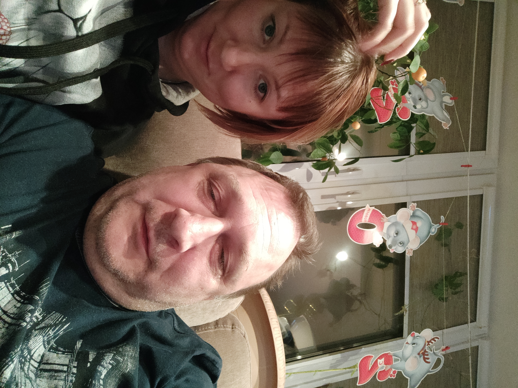

In [ ]:
img

# сервисная функция для вывода картинки с помощью инструмента .imshow() из модуля plt:

In [ ]:
def show_image(img):
    plt.figure(figsize=(4,2))            # Cоздание полотна для рисования
    plt.imshow(img)                       # Отрисовка изображения
    plt.axis('off')                       # Отключение ненужных осей
    plt.show()                            # Вывод результата

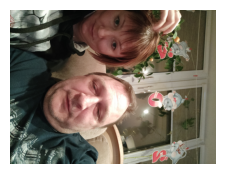

In [ ]:
show_image(img)

#  функция для визуального сравнения исходного изображения с измененным:

In [ ]:
def show_image_pair(img1, img2):
    # Cоздание полотна для рисования двух изображений
    fig, axs = plt.subplots(1, 2, figsize=(4, 2))
    # Исходное изображение
    axs[0].imshow(img1)
    axs[0].axis('off')
    # Модифицированное изображение
    axs[1].imshow(img2)
    axs[1].axis('off')
    # Вывод изображений
    plt.show()

# Обрезка: .сrop()
Функция имеет следующие аргументы:

box - кортеж из четырех значений

(left, upper, right, lower)
- координаты левого верхнего и правого нижнего углов рамки для обрезки.

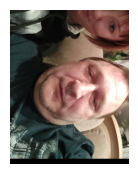

(270, 350)

In [ ]:
img1 = img
img2 = img1.crop((30, 50, 300, 400))

# Вывод картинки
show_image(img2)

# Вывод размеров результата
img2.size

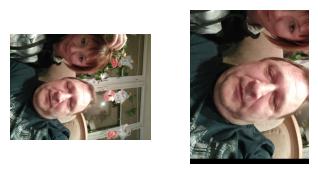

In [ ]:
show_image_pair(img1, img2)

# Вращение: .rotate()
С помощью функции-метода **.rotate() **можно вращать картинку внутри ее границ.


Функция имеет следующие аргументы (символом * обозначены необязательные):


**angle** - угол поворота в градусах. Положительное число - поворот против часовой стрелки, отрицательное - по часовой стрелке;

'resample*'   - способ обработки пикселей: NEAREST, BOX, BICUBIC ...;

expand* - если True, то расширяет размеры выходного изображения, чтобы повернутая картинка уместилась полностью. По умолчанию False. Предполагает вращение вокруг центра изображения и без смещения;

center* - центр вращения (отсчитывается от левого верхнего угла), по умолчанию - центр изображения. Принимает кортеж из двух значений;

translate*  - смещение после поворота, принимает кортеж из двух значений, по умолчанию None;

fillcolor* - цвет заливки пустой области, по умолчанию черный, принимает кортеж из трех значений.

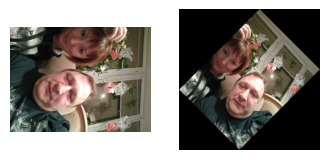

(642, 642)

In [ ]:
angle = 45
img2 = img1.rotate(angle, expand=True)

# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
img2.size


# подрезка изображения чтобы небыло черных углов

In [ ]:
def rotated_rect(w,                       # Ширина изображения
                 h,                       # Высота изображения
                 angle                    # Угол поворота в градусах
                 ):
    angle = math.radians(angle)
    width_is_longer = w >= h
    side_long, side_short = (w,h) if width_is_longer else (h,w)

    sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))

    if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
        x = 0.5 * side_short
        wr, hr = (x/sin_a, x/cos_a) if width_is_longer else (x/cos_a, x/sin_a)
    else:
        cos_2a = cos_a*cos_a - sin_a*sin_a
        wr, hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

    return wr, hr # Ширина и Высота прямоугольника обрезки

 исходное изображение : Ширина = 518,Высота = 388
Градус поворота = 45 градусов


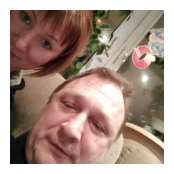

(274, 274)

In [ ]:
print( f' исходное изображение : Ширина = {img1.width},Высота = {img1.height}')
print(f'Градус поворота = {angle} градусов')
# Вычисление размеров прямоугольника обрезки максимальной площади
crop_w, crop_h = rotated_rect(img1.width, img1.height, angle)
img2 = img1.rotate(angle, expand=True)
# Обрезка повернутого изображения
w, h = img2.size
img_rot_crop = img2.crop(((w - crop_w)*0.5, (h - crop_h)*0.5,
                             (w + crop_w)*0.5, (h + crop_h)*0.5))

# Вывод картинки
show_image(img_rot_crop)
img_rot_crop.size

# Отражение или поворот на угол, кратный 90 градусам: .transpose()

In [ ]:
# Функция .transpose() имеет один обязательный аргумент:

# method - задает вид операции:
# FLIP_LEFT_RIGHT, FLIP_TOP_BOTTOM, ROTATE_90, ROTATE_180, ROTATE_270, TRANSPOSE, TRANSVERSE.

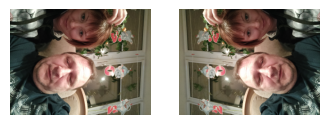

(518, 388)


(518, 388)

In [ ]:
img2 = img1.transpose(Image.FLIP_LEFT_RIGHT)

# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
print(img1.size)
img2.size

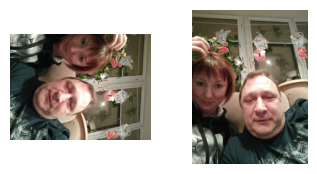

(518, 388)


(388, 518)

In [ ]:
img2 = img1.transpose(Image.ROTATE_90)

# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
print(img1.size)
img2.size

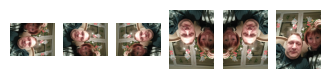

In [ ]:
img2 = img1.transpose(Image.FLIP_TOP_BOTTOM)
img3 = img1.transpose(Image.ROTATE_180)
img4 = img1.transpose(Image.ROTATE_270)
img5 = img1.transpose(Image.TRANSPOSE)
img6 = img1.transpose(Image.TRANSVERSE)
 # Cоздание полотна для рисования  изображений
fig, axs = plt.subplots(1, 6, figsize=(4, 2))
a = [img1,img2,img3,img4,img5,img6]
for i in range(6):
    # Исходное изображение
  axs[i].imshow(a[i])
  axs[i].axis('off')
# # Модифицированное изображение
# axs[1].imshow(img2)
# axs[1].axis('off')
#     # Вывод изображений
plt.show()

# Изменение контрастности: Contrast

In [ ]:
from PIL import ImageEnhance
# Модуль ImageEnhance содержит дополнительные инструменты для манипуляций с изображениями.
# В частности, в нем есть класс Contrast, который отвечает за контрастность изображения.

# Для вычисления результата необходимо создать экземпляр класса
# и применить функцию-метод .enhance(),
# указав в скобках один обязательный аргумент - коэффициент усиления,
# где 0. - сплошное серое изображение, а 1. - исходное изображение:

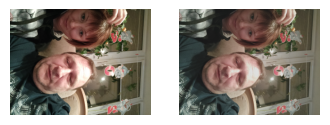

(518, 388)


(518, 388)

In [ ]:
enh = ImageEnhance.Contrast(img1)         # Создание экземпляра класса Contrast
img2 = enh.enhance(0.8)              # Изменение коэффициента контраста
# Вывод картинки
show_image_pair(img1, img2)
# Вывод размеров результата
print(img1.size)
img2.size

# Изменение яркости: Brightness

In [ ]:
# Для вычисления результата необходимо создать экземпляр класса и применить функцию-метод .enhance()
#, указав в скобках один обязательный аргумент - коэффициент усиления,
#Коэффициент усиления для яркости (Brightness) может находиться в диапазоне от 0 до 100,
# где 0 – минимальное значение (полностью поглощенный свет)
# и 100 – максимальное значение (максимальная яркость).

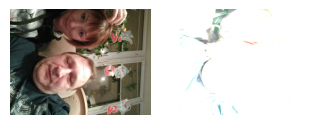

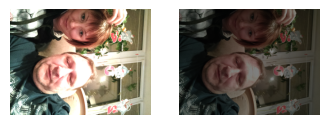

In [ ]:
enh = ImageEnhance.Brightness(img1)
img2 = enh.enhance(20)
img3 = enh.enhance(1.5) # + 50% яркости
img4 = enh.enhance(0.5) # - 50% яркости
# Вывод картинки
show_image_pair(img1, img2)
show_image_pair(img3, img4)

